<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy as sp
from scipy import signal
from datetime import timedelta, datetime

# Importing Data

## Importing Hourly Resolution Data

### Obtaining Longitudes and Latitudes from All Stations

We start by reading the first two lines of the data file to obtain the longitude and latitude information of the stations. We zip them together into a list of tuples, and add an element to the beginning of this list corresponding to the time.

In [3]:
lon_and_lat = np.genfromtxt('AllStations_temperature_h_2017.dat', delimiter=" ", max_rows=2)
longitudes = lon_and_lat[0][~np.isnan(lon_and_lat[0])]
latitudes = lon_and_lat[1][~np.isnan(lon_and_lat[1])]

indices = list(zip(longitudes, latitudes))
indices.insert(0, "time")

### Reading the Temperature Data

We now read in the temperature data, skipping the first two rows that contain the longitude and latitude information of the stations. The column names of the dataframe are the longitude and latitude tuples created above, and the index column is the timestamps.

In [4]:
df = pd.read_csv('AllStations_temperature_h_2017.dat', sep='\s+', skiprows=[0,1], names=indices, index_col = 'time')
df.head()

,236.554,236.499,236.679,236.607,236.514,236.630,236.523,236.543,236.662,236.304,...,236.641,236.619,236.514,236.357,236.574,236.596,236.676,236.691,236.689,236.451
,48.5745,48.5376,48.4655,48.4608,48.4356,48.5273,48.4529,48.6804,48.4562,48.3891,...,48.4683,48.4744,48.4205,48.6568,48.4533,48.6529,48.4865,48.4623,48.4359,48.4572
time,,,,,,,,,,,,,,,,,,,,,
733408.0000,3.25,1.43,4.21,4.62,3.45,4.44,2.72,3.97,4.68,5.12,...,4.29,4.10,3.01,NaN,4.00,4.81,4.58,NaN,4.87,4.07
733408.0417,3.06,1.38,4.28,4.77,3.46,4.21,2.64,4.15,4.61,4.95,...,4.41,4.30,2.87,NaN,4.15,4.60,4.44,NaN,4.85,4.05
733408.0833,1.90,1.18,4.12,4.70,3.46,4.07,2.64,4.18,4.62,5.11,...,4.24,4.23,2.97,NaN,4.06,4.65,4.47,NaN,4.91,4.02
733408.1250,1.69,0.98,4.20,4.77,3.65,3.67,2.81,4.27,4.71,5.33,...,4.36,4.30,3.10,NaN,4.12,4.75,4.53,NaN,4.97,4.06
733408.1667,2.09,0.93,4.61,4.99,3.90,3.55,3.11,4.29,4.93,5.56,...,4.58,4.53,3.37,NaN,4.25,4.97,4.68,NaN,5.17,4.27


### Changing the Datetimes into Appropriate Timestamps

The Datetimes used in this file are MATLAB datetimes. We use a function to convert each time in the time column to the appropriate timestamp and then change the index column into timestamps.

In [5]:
def matlab_to_python_datetime(matlab_datenum):
    return datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days = 366)

df.index = [matlab_to_python_datetime(i) for i in df.index]
df.head()

,236.554,236.499,236.679,236.607,236.514,236.630,236.523,236.543,236.662,236.304,...,236.641,236.619,236.514,236.357,236.574,236.596,236.676,236.691,236.689,236.451
,48.5745,48.5376,48.4655,48.4608,48.4356,48.5273,48.4529,48.6804,48.4562,48.3891,...,48.4683,48.4744,48.4205,48.6568,48.4533,48.6529,48.4865,48.4623,48.4359,48.4572
2008-01-01 00:00:00.000000,3.25,1.43,4.21,4.62,3.45,4.44,2.72,3.97,4.68,5.12,...,4.29,4.10,3.01,NaN,4.00,4.81,4.58,NaN,4.87,4.07
2008-01-01 01:00:02.879995,3.06,1.38,4.28,4.77,3.46,4.21,2.64,4.15,4.61,4.95,...,4.41,4.30,2.87,NaN,4.15,4.60,4.44,NaN,4.85,4.05
2008-01-01 01:59:57.120005,1.90,1.18,4.12,4.70,3.46,4.07,2.64,4.18,4.62,5.11,...,4.24,4.23,2.97,NaN,4.06,4.65,4.47,NaN,4.91,4.02
2008-01-01 03:00:00.000000,1.69,0.98,4.20,4.77,3.65,3.67,2.81,4.27,4.71,5.33,...,4.36,4.30,3.10,NaN,4.12,4.75,4.53,NaN,4.97,4.06
2008-01-01 04:00:02.879995,2.09,0.93,4.61,4.99,3.90,3.55,3.11,4.29,4.93,5.56,...,4.58,4.53,3.37,NaN,4.25,4.97,4.68,NaN,5.17,4.27


### Finding the Required Station

These are the coordinates where we wish to measure the temperature. We look for the station nearest to this point.

In [6]:
station_lon = 236.691
station_lat =  48.462

In [7]:
lon_diff = abs(longitudes - station_lon)
lat_diff = abs(latitudes - station_lat)

station_num = list((lon_diff+lat_diff)).index(min(lon_diff+lat_diff))

station_num provides the column number of the data we wish to observe.

### Obtain Winter and Summer Data

In [8]:
df = df.iloc[:,station_num]

winter_start = pd.Timestamp(year=2015, month=12, day=1, hour=0)
winter_end = pd.Timestamp(year=2016, month=3, day=1, hour=0)
summer_start = pd.Timestamp(year=2016, month=6, day=1, hour=0)
summer_end = pd.Timestamp(year=2016, month=9, day=1, hour=0)

winter_data = df[(df.index>winter_start) & (df.index<winter_end)]
summer_data = df[(df.index>summer_start) & (df.index<summer_end)]

# The Lag Coefficient

For a discrete time series we have

$$r_{xx}(\tau_k)=\frac{1}{N-k}\sum_{i=1}^{N-k} (x_i-\bar{x})(x_{i+k}-\bar{x}) $$

where $\tau_k = k\Delta t$ where $\Delta t$ is our sampling rate and $k$ is an integer. This formula requires that the time series $x(t)$ is de-meaned. Note that

$$x_i \equiv x(i\Delta t) $$

## Self-Coded

In [9]:
def get_Rxy(x, y, dt=1, N=10, pos_only = False):
    if pos_only:
        lags = range(0, N)
    else:
        lags = range(-N,N) # the lags are integers
    
    taus = dt*np.array(lags)
    Rxy = 0.*np.array(lags)
    
    # note that mean(x)=mean(y)=0
    x = x-np.mean(x)
    y = y-np.mean(y)
    
    for ind,tau in enumerate(lags): #tau is the lag
        if tau<0:
            Rxy[ind]=np.sum(x[:tau]*y[-tau:])
        elif tau==0:
            Rxy[ind]=np.sum(x*y)
        else:
            Rxy[ind]=np.sum(x[:-tau]*y[tau:])
    
    return taus, Rxy

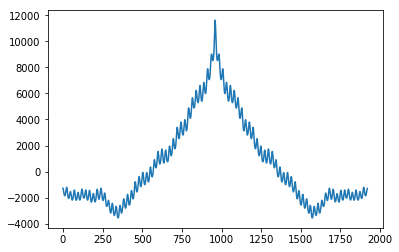

In [10]:
plt.plot(get_Rxy(winter_data.values, winter_data.values, dt=1, N=40*24)[1])

## Python (Numpy) Method

In [11]:
yunbiased = winter_data.values-np.mean(winter_data.values)
acor = np.correlate(yunbiased, yunbiased, "same")

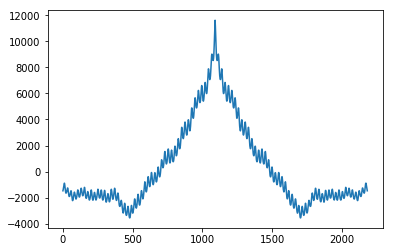

In [12]:
plt.plot(acor)

<b> Note: </b> These are not the plots I use to answer the question: see the formal plots below. I just wanted to show that the results of python's method and my self coded method return the same thing.

Usually one would normalize these plots such that $R_{xx}(\tau = 0)=1$.

# Part 1: Winter Time Series

## (i) Plot the Time Series

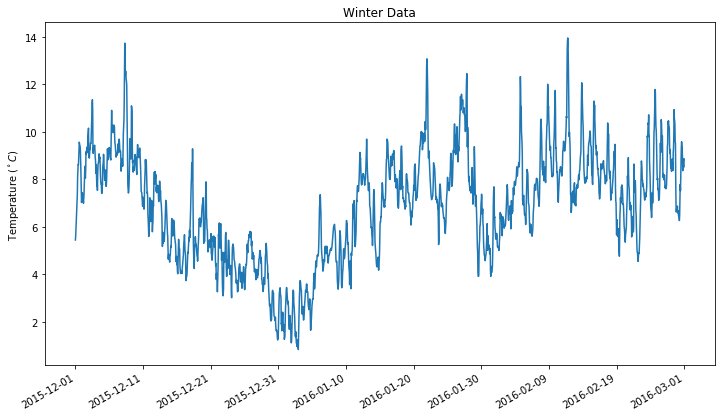

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12,7))

ax.plot(winter_data, label = 'Hour Resolution Data')
ax.set_ylabel('Temperature $(^\circ C)$')
ax.set_title('Winter Data')

xfmt = mdates.DateFormatter('%Y-%m-%d')

xticks = pd.to_datetime(np.linspace(winter_start.value, winter_end.value, 10))
ax.xaxis.set_ticks(xticks)
ax.xaxis.set_major_formatter(xfmt)

fig.autofmt_xdate()

plt.show()

## (ii) Calculate the Lag Coefficient

In [14]:
dt = 1./24
N = 40*24
taus1, rxy1 = get_Rxy(winter_data.values, winter_data.values, dt=dt, N=N, pos_only = True)
rxy1 = rxy1/rxy1[0]

## (iii) Plotting

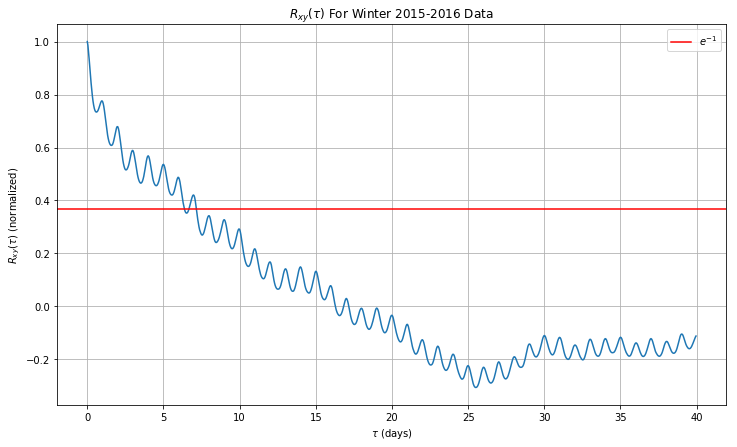

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12,7))

ax.plot(taus1,rxy1)
ax.axhline(1/np.e, color='r', label='$e^{-1}$')
ax.set_xlabel(r'$\tau$ (days)')
ax.set_ylabel(r'$R_{xy}(\tau)$ (normalized)')
ax.set_title(r'$R_{xy}(\tau)$ For Winter 2015-2016 Data')
ax.legend()
ax.grid()

plt.show()

The envelope falls below $e^{-1}$ after 7 days. 

# Part 2: Summer Time Series

## (i) Plot the Time Series

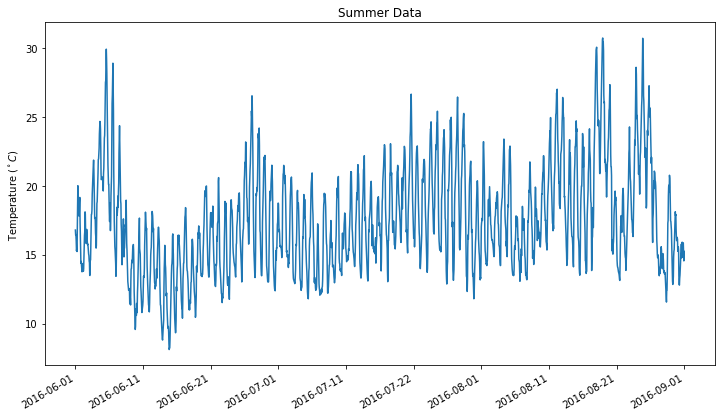

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12,7))

ax.plot(summer_data, label = 'Hour Resolution Data')
ax.set_ylabel('Temperature $(^\circ C)$')
ax.set_title('Summer Data')

xfmt = mdates.DateFormatter('%Y-%m-%d')

xticks = pd.to_datetime(np.linspace(summer_start.value, summer_end.value, 10))
ax.xaxis.set_ticks(xticks)
ax.xaxis.set_major_formatter(xfmt)

fig.autofmt_xdate()

plt.show()

## (ii) Calculate the Lag Coefficient

In [17]:
dt = 1./24
N = 40*24
taus2, rxy2 = get_Rxy(summer_data.values, summer_data.values, dt=dt, N=N, pos_only = True)
rxy2 = rxy2/rxy2[0]

## (iii) Plotting

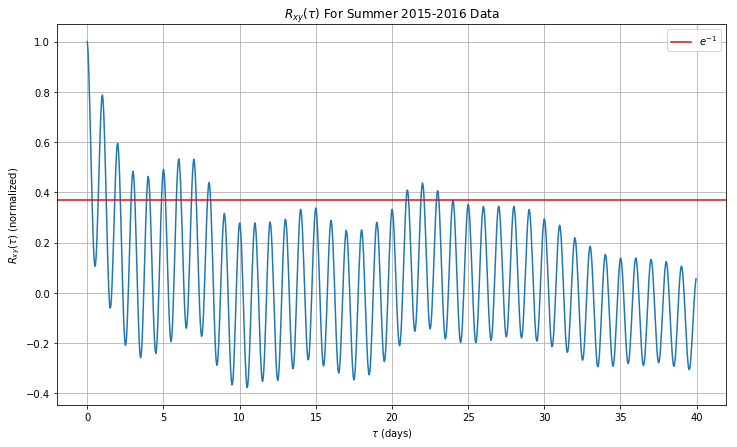

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12,7))

ax.plot(taus2,rxy2)
ax.axhline(1/np.e, color='r', label='$e^{-1}$')
ax.set_xlabel(r'$\tau$ (days)')
ax.set_ylabel(r'$R_{xy}(\tau)$ (normalized)')
ax.set_title(r'$R_{xy}(\tau)$ For Summer 2015-2016 Data')
ax.legend()
ax.grid()

plt.show()

The envelope falls below $e^{-1}$ after 8 days. 

# Comparison of the Results

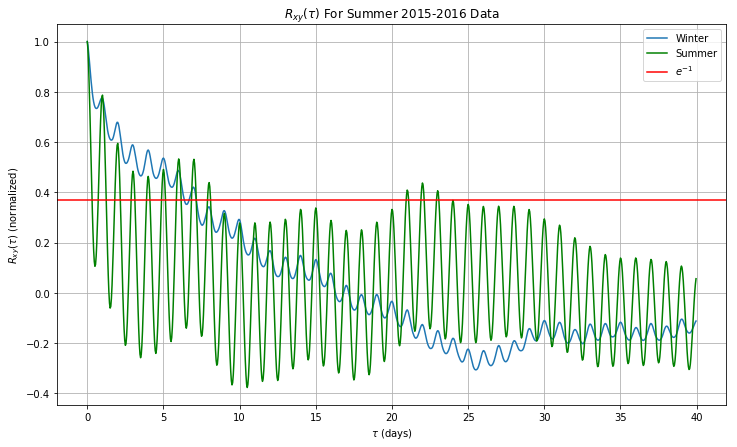

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12,7))

ax.plot(taus1,rxy1, label='Winter')
ax.plot(taus2,rxy2, color='g', label='Summer')
ax.axhline(1/np.e, color='r', label='$e^{-1}$')
ax.set_xlabel(r'$\tau$ (days)')
ax.set_ylabel(r'$R_{xy}(\tau)$ (normalized)')
ax.set_title(r'$R_{xy}(\tau)$ For Summer 2015-2016 Data')
ax.legend()
ax.grid()

plt.show()

While the lag correlation coefficient was approximately $0.8$ for both the summer and winter after 1 day, it remained higher in the winter than for the summer for the next few days.

An intersting observation is that the lag coeffient for $\tau=12$ hours (and odd multiples of $12$ hours) appears to be greater for winter than for the summer. This suggests that while the temperatures of winter evenings are more closely linked to the temperature during the day, the temperatures of summer evenings are almost entirely uncorrelated with the temperature during the day.

The "dummy" weather forecast appears to be equally valid for both winter and summer; the lag correlation coefficient for $\tau=24$ hours is $0.8$ for each season. Since a correlation coefficient of $>0.7$ is typically thought of as a strong linear relationship, it is fair to say that the "dummy" weather forecast is a strong forecast.